In [1]:
import pandas as pd
import numpy as np
import os
import tqdm

import torch
from torch.nn import CosineSimilarity

def cosine_sim(x,y):
    cos = CosineSimilarity(dim=1, eps=1e-6)
    coef_of_similarity = cos(torch.tensor(x.reshape(1,-1).astype('float64')), torch.tensor(y.reshape(1,-1).astype('float64')))
    return coef_of_similarity

os.environ['JAVAHOME'] = "C:/Program Files/Java/jre1.8.0_341/bin/java.exe"

In [2]:
train = pd.read_csv('C:/datasets/nlp-getting-started/train.csv')
test = pd.read_csv('C:/datasets/nlp-getting-started/test.csv')

In [3]:
train['keyword'].describe(), test['keyword'].describe()

(count           7552
 unique           221
 top       fatalities
 freq              45
 Name: keyword, dtype: object,
 count        3237
 unique        221
 top       deluged
 freq           23
 Name: keyword, dtype: object)

In [4]:
train['keyword'].isna().mean(), test['keyword'].isna().mean()

(0.008012610009194798, 0.00796812749003984)

In [5]:
non_nan_indexes_train = train['keyword'].notnull()[train['keyword'].notnull() == True].index
for value in train['keyword'].loc[non_nan_indexes_train].values:
    if '%20' in value:
        for i in train['keyword'][train['keyword'] == value].index:
            train.loc[i,'keyword'] = train.loc[i,'keyword'].replace('%20', ' ')

In [6]:
for value in tqdm.tqdm(train['keyword'].loc[non_nan_indexes_train].values):
    if len(value.split(' ')) == 2:
        for i in train['keyword'][train['keyword'] == value].index:
            train.loc[i,'keyword'] = train.loc[i,'keyword'].split(' ')[1]
    elif len(value.split(' ')) == 3:
        for i in train['keyword'][train['keyword'] == value].index:
            train.loc[i,'keyword'] = train.loc[i,'keyword'].split(' ')[0]
    elif len(value.split(' ')) == 1:
        for i in train['keyword'][train['keyword'] == value].index:
            train.loc[i,'keyword'] = train.loc[i,'keyword'].split(' ')[0]

100%|█████████████████████████████████████████████████████████████████████████████| 7552/7552 [00:29<00:00, 257.76it/s]


In [7]:
train['keyword'].unique()[105:110]

array(['flames', 'flattened', 'flood', 'flooding', 'floods'], dtype=object)

In [8]:
non_nan_indexes_test = test['keyword'].notnull()[test['keyword'].notnull() == True].index
for value in test['keyword'].loc[non_nan_indexes_test].values:
    if '%20' in value:
        for i in test['keyword'][test['keyword'] == value].index:
            test.loc[i,'keyword'] = test.loc[i,'keyword'].replace('%20', ' ')

In [9]:
for value in tqdm.tqdm(test['keyword'].loc[non_nan_indexes_test].values):
    if len(value.split(' ')) == 2:
        for i in test['keyword'][test['keyword'] == value].index:
            test.loc[i,'keyword'] = test.loc[i,'keyword'].split(' ')[1]
    elif len(value.split(' ')) == 3:
        for i in test['keyword'][test['keyword'] == value].index:
            test.loc[i,'keyword'] = test.loc[i,'keyword'].split(' ')[0]
    elif len(value.split(' ')) == 1:
        for i in test['keyword'][test['keyword'] == value].index:
            test.loc[i,'keyword'] = test.loc[i,'keyword'].split(' ')[0]

100%|█████████████████████████████████████████████████████████████████████████████| 3237/3237 [00:06<00:00, 538.75it/s]


In [10]:
train['keyword'] = train['keyword'].replace('bioterror', 'terror')
test['keyword'] = test['keyword'].replace('bioterror', 'terror')
train['keyword'] = train['keyword'].replace('bioterrorism', 'terrorism')
test['keyword'] = test['keyword'].replace('bioterrorism', 'terrorism')
train['keyword'] = train['keyword'].replace('inundation', 'flooding')
test['keyword'] = test['keyword'].replace('inundation', 'flooding')

In [11]:
test['keyword'].unique()[105:110]

array(['flames', 'flattened', 'flood', 'flooding', 'floods'], dtype=object)

In [12]:
set(train['keyword'].unique()) - set(test['keyword'].unique()), set(test['keyword'].unique()) - set(train['keyword'].unique())

(set(), set())

In [13]:
keywords_to_word2vec = list(set(np.hstack((train.loc[non_nan_indexes_train,'keyword'].unique(), test.loc[non_nan_indexes_test,'keyword'].unique()))))
keywords_to_word2vec = sorted(keywords_to_word2vec)
keywords_to_word2vec[100:115]

['flattened',
 'flood',
 'flooding',
 'floods',
 'hail',
 'hailstorm',
 'harm',
 'hazard',
 'hazardous',
 'hellfire',
 'hijack',
 'hijacker',
 'hijacking',
 'hostage',
 'hostages']

In [14]:
import gensim.downloader as api
vector_size = 25
info = api.info()  # show info about available models/datasets
model = api.load("glove-twitter-25")  # download the model and return as object ready for use

In [15]:
model.most_similar("truck")

[('cab', 0.9168301224708557),
 ('seat', 0.9121010303497314),
 ('boat', 0.9037622213363647),
 ('parking', 0.9019120931625366),
 ('car', 0.8898833990097046),
 ('cars', 0.8853296041488647),
 ('jet', 0.8847488164901733),
 ('motorcycle', 0.8827580809593201),
 ('garage', 0.8805713653564453),
 ('counter', 0.8791940212249756)]

In [16]:
cosine_sim(model.get_vector('flame'), model.get_vector('fire'))

tensor([0.7797], dtype=torch.float64)

In [17]:
model.get_vector('terror')

array([ 1.2578e+00, -4.7745e-01,  3.2095e-01,  6.1364e-01,  4.4040e-01,
       -9.8262e-04,  6.0090e-01,  2.2764e-01,  4.9802e-01, -3.4116e-01,
        6.6899e-02, -1.2499e+00, -1.8738e+00,  3.1721e-01,  9.3223e-01,
        7.5150e-01, -2.0688e-01,  1.0058e+00,  2.1184e-01, -4.6021e-01,
       -5.5135e-02,  3.2931e-01,  6.8041e-02, -1.1621e+00,  1.0398e+00],
      dtype=float32)

In [18]:
dict_word2vec = dict()
for word in keywords_to_word2vec:
    dict_word2vec[word] = model.get_vector(word)

In [19]:
word_vec = pd.DataFrame();
temp = pd.DataFrame({'word':[]})
word_vec = pd.concat([word_vec, temp])
for i in range(vector_size):
    temp = pd.DataFrame({f'word_x{i+1}':[]})
    word_vec = pd.concat([word_vec, temp])

In [20]:
for word, values in tqdm.tqdm(dict_word2vec.items()):
    temp = pd.DataFrame({'word':[word]})
    word_vec = pd.concat([word_vec, temp])
word_vec = word_vec.reset_index().drop('index',axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 203/203 [00:00<00:00, 276.16it/s]


In [21]:
for word, values in tqdm.tqdm(dict_word2vec.items()):
    indx = word_vec['word'][word_vec['word'] == word].index
    for i in range(word_vec.columns[1:].shape[0]):
        word_vec.loc[indx, word_vec.columns[1:][i]] = dict_word2vec[word][i]

100%|███████████████████████████████████████████████████████████████████████████████| 203/203 [00:01<00:00, 130.14it/s]


In [22]:
train[word_vec.columns[1:]] = np.nan
train[word_vec.columns[1:]] = train[word_vec.columns[1:]].astype('float32')
test[word_vec.columns[1:]] = np.nan
test[word_vec.columns[1:]] = test[word_vec.columns[1:]].astype('float32')

In [23]:
for word in tqdm.tqdm(word_vec['word'].values):
    for ind in train['keyword'][train['keyword'] == word].index:
        ind_wrd = word_vec['word'][word_vec['word'] == word].index.item()
        train.loc[ind,word_vec.columns[1:]] = word_vec.loc[ind_wrd, word_vec.columns[1:]]

100%|████████████████████████████████████████████████████████████████████████████████| 203/203 [00:19<00:00, 10.52it/s]


In [24]:
for word in tqdm.tqdm(word_vec['word'].values):
    for ind in test['keyword'][test['keyword'] == word].index:
        ind_wrd = word_vec['word'][word_vec['word'] == word].index.item()
        test.loc[ind,word_vec.columns[1:]] = word_vec.loc[ind_wrd, word_vec.columns[1:]]

100%|████████████████████████████████████████████████████████████████████████████████| 203/203 [00:08<00:00, 24.34it/s]


In [25]:
# next feature extraction

In [26]:
import string
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from nltk.tag.stanford import StanfordNERTagger # location filter
PATH_TO_JAR='C:/Users/TimurRashitov/stanford-ner-2020-11-17/stanford-ner.jar' # location filter data
PATH_TO_MODEL = 'C:/Users/TimurRashitov/stanford-ner-2020-11-17/classifiers/english.all.3class.distsim.crf.ser.gz' # location filter model
tagger = StanfordNERTagger(model_filename=PATH_TO_MODEL,path_to_jar=PATH_TO_JAR, encoding='utf-8')
# EXAMPLE OF LOCATION EXTRACTION WITH STANFORD NER 
# words = nltk.word_tokenize('I Love Britain')
# tagged = tagger.tag(words)
# [('I', 'O'), ('Love', 'O'), ('Britain', 'LOCATION')]


tt = TweetTokenizer()
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

def clean_text_location(text):
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    sent = re.sub('\s+', ' ', text_nopunct).strip()
    # keep only letters
    sent = re.sub(r'[^a-zA-Z]', ' ', sent)
    return sent

def lematize_remove_stopwords_and_punctuation_in_tokenized_sentence(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    sent = re.sub('\s+', ' ', text_nopunct).strip()
    sent = re.sub(r'[^a-zA-Z]', ' ', sent)
    sent = tt.tokenize(sent)
    for i in range(len(sent)):
        sent[i] = lemmatizer.lemmatize(sent[i], wordnet.VERB)
    filtered_sentence = []
    for w in sent:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

In [27]:
train['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [28]:
non_nan_indexes_train = train['location'].notnull()[train['location'].notnull() == True].index
non_nan_indexes_test = test['location'].notnull()[test['location'].notnull() == True].index

In [29]:
train['location'].isna().sum()

2533

In [30]:
train['location']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7608    NaN
7609    NaN
7610    NaN
7611    NaN
7612    NaN
Name: location, Length: 7613, dtype: object

In [31]:
train.loc[non_nan_indexes_train, 'location'].unique()[1000:2000]

array(['turner fenton', 'KLA,Uganda', 'Uganda', '253', 'Elkhart, IN',
       'Pon Di Gully', 'Benedict College', 'HTX', 'IM LOST ', 'Miami',
       'Hamilton, ON', 'Des Moines, Iowa ', 'Rural Northern Nevada',
       'Republic of the Philippines', 'Philippines ', 'hyderabad',
       'Vancouver (HQ) and worldwide', 'Quezon City, Philippines',
       'Geneva', 'Hartford,  connecticut', 'Sioux Falls, SD', 'Cornwall',
       'Beside Basketball', 'Rome, Italy', 'Tafekop Ga-Matsepe',
       'Melbourne', 'Vilnius', 'Made in America', 'PS4, now stop asking',
       'Cheshire. London. #allover', 'Bartholomew County, Indiana', 'U.S',
       'My mind is my world', 'Catskills', 'Columbia, SC', 'Right here',
       'Lawrence, KS via Emporia, KS', 'http://twitch.tv/jcmonkey',
       'Unknown', 'Marysville, MI', 'New Haven, Connecticut',
       'Austin | San Diego', '??? ?? ??????? ', 'Pontevedra, Galicia',
       'Somewhere in the Canada', 'London/New York',
       '261 5th Avenue New York, NY ', 'R

In [32]:
for ind in non_nan_indexes_train:
    train.loc[ind, 'location'] = clean_text_location(train.loc[ind, 'location'])

In [33]:
for ind in non_nan_indexes_test:
    test.loc[ind, 'location'] = clean_text_location(test.loc[ind, 'location'])

In [34]:
for ind in non_nan_indexes_train:
    processed_sentence = lematize_remove_stopwords_and_punctuation_in_tokenized_sentence(train.loc[ind, 'location'])
    for k in range(len(processed_sentence)):
        processed_sentence[k] = processed_sentence[k].capitalize()
    processed_sentence = ' '.join(processed_sentence)
    train.loc[ind, 'location'] = processed_sentence

In [35]:
for ind in non_nan_indexes_test:
    processed_sentence = lematize_remove_stopwords_and_punctuation_in_tokenized_sentence(test.loc[ind, 'location'])
    for k in range(len(processed_sentence)):
        processed_sentence[k] = processed_sentence[k].capitalize()
    processed_sentence = ' '.join(processed_sentence)
    test.loc[ind, 'location'] = processed_sentence

In [36]:
len(train.loc[non_nan_indexes_train,'location'].unique()), len(test.loc[non_nan_indexes_test,'location'].unique())

(2913, 1436)

In [37]:
sentences_to_embeddings = list(set(np.hstack((train.loc[non_nan_indexes_train,'location'].unique(), test.loc[non_nan_indexes_test,'location'].unique()))))
sentences_to_embeddings = sorted(sentences_to_embeddings)
len(sentences_to_embeddings)

3897

In [38]:
sentences_to_embeddings[980:1000]

['Ely Cambridgeshire',
 'Email Lovethterrygmailcom',
 'Emily Helen Shelley',
 'Emirate',
 'Emirates',
 'Empire State',
 'Empirefirst Order',
 'En El Pais De Los Arrechos',
 'Enemy State',
 'Enfield Uk',
 'England',
 'England Great Britain',
 'England Uk',
 'England Unite Kingdom',
 'England Wales Border Uk',
 'Englandukeuropesol',
 'Englewood Chicago',
 'English Midlands',
 'Enniscrone Aughris Sligo',
 'Enterprise Alabama']

In [39]:
train.loc[34, 'location']

'Philadelphia Pa'

In [40]:
train.loc[non_nan_indexes_train,'location'].unique().tolist()[3]

'Philadelphia Pa'

In [41]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('stsb-mpnet-base-v2')
vector_size = 768

In [42]:
embeddings = sbert_model.encode(sentences_to_embeddings)

In [43]:
# sent = ' '.join(['England', 'Great', 'Britain', 'Emirates'])
# sent_vec = sbert_model.encode([sent])
# query = ' '.join(['England', 'Great', 'Britain'])
# query_vec = sbert_model.encode([query])

import torch
from torch.nn import CosineSimilarity
def cosine_sim(x,y):
    cos = CosineSimilarity(dim=1, eps=1e-6)
    coef_of_similarity = cos(torch.tensor(x.reshape(1,-1).astype('float64')), torch.tensor(y.reshape(1,-1).astype('float64')))
    return coef_of_similarity

In [44]:
len(sentences_to_embeddings)

3897

In [45]:
embeddings.shape

(3897, 768)

In [46]:
wordpairs_2vec = dict()
for index in range(len(sentences_to_embeddings)):
    wordpairs_2vec[sentences_to_embeddings[index]] = embeddings[index]

In [47]:
# wordpairs_vec = pd.DataFrame();
# temp = pd.DataFrame({'wordpair':[]})
# wordpairs_vec = pd.concat([wordpairs_vec, temp])
# for i in range(vector_size):
#     temp = pd.DataFrame({f'x{i+1}':[]})
#     wordpairs_vec = pd.concat([wordpairs_vec, temp])

In [48]:
# for wordpair, values in tqdm.tqdm(wordpairs_2vec.items()):
#     temp = pd.DataFrame({'wordpair':[wordpair]})
#     wordpairs_vec = pd.concat([wordpairs_vec, temp])
# wordpairs_vec = wordpairs_vec.reset_index().drop('index',axis=1)

In [49]:
# for wordpair, values in tqdm.tqdm(wordpairs_2vec.items()):
#     indx = wordpairs_vec['wordpair'][wordpairs_vec['wordpair'] == wordpair].index
#     for i in range(wordpairs_vec.columns[1:].shape[0]):
#         wordpairs_vec.loc[indx, wordpairs_vec.columns[1:][i]] = wordpairs_2vec[wordpair][i]

In [50]:
wordpairs_vec = pd.read_csv('C:/datasets/nlp-getting-started/location_embeddings.csv')

In [51]:
wordpairs_vec[wordpairs_vec.columns[1:]] = wordpairs_vec[wordpairs_vec.columns[1:]].astype('float64')

In [52]:
cosine_sim(wordpairs_vec.loc[1012,wordpairs_vec.columns[1:]].values, wordpairs_vec.loc[1013,wordpairs_vec.columns[1:]].values)

tensor([0.8827], dtype=torch.float64)

In [53]:
train[wordpairs_vec.columns[1:]] = np.nan
train[wordpairs_vec.columns[1:]] = train[wordpairs_vec.columns[1:]].astype('float32')
test[wordpairs_vec.columns[1:]] = np.nan
test[wordpairs_vec.columns[1:]] = test[wordpairs_vec.columns[1:]].astype('float32')

C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\4093466658.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[wordpairs_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\4093466658.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[wordpairs_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\4093466658.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\4093466658.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[wordpairs_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\4093466658.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[wordpairs_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\4093466658.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\4093466658.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[wordpairs_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\4093466658.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[wordpairs_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\4093466658.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\4093466658.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[wordpairs_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\4093466658.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[wordpairs_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\4093466658.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

In [54]:
for wordpair in tqdm.tqdm(wordpairs_vec['wordpair'].values):
    for ind in train['location'][train['location'] == wordpair].index:
        ind_wrd = wordpairs_vec['wordpair'][wordpairs_vec['wordpair'] == wordpair].index.item()
        train.loc[ind,wordpairs_vec.columns[1:]] = wordpairs_vec.loc[ind_wrd, wordpairs_vec.columns[1:]]

100%|██████████████████████████████████████████████████████████████████████████████| 3897/3897 [03:17<00:00, 19.70it/s]


In [55]:
for wordpair in tqdm.tqdm(wordpairs_vec['wordpair'].values):
    for ind in test['location'][test['location'] == wordpair].index:
        ind_wrd = wordpairs_vec['wordpair'][wordpairs_vec['wordpair'] == wordpair].index.item()
        test.loc[ind,wordpairs_vec.columns[1:]] = wordpairs_vec.loc[ind_wrd, wordpairs_vec.columns[1:]]

100%|██████████████████████████████████████████████████████████████████████████████| 3897/3897 [01:25<00:00, 45.83it/s]


In [56]:
# text feature

In [57]:
def clean_text_text(text):
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    sent = re.sub('\s+', ' ', text_nopunct).strip()
    # keep only letters
    sent = re.sub(r'[^a-zA-Z]', ' ', sent)
    return sent

def lematize_remove_stopwords_and_punctuation_in_tokenized_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    sent = re.sub('\s+', ' ', text_nopunct).strip()
    sent = re.sub(r'[^a-zA-Z]', ' ', sent)
    sent = tt.tokenize(sent)
    for i in range(len(sent)):
        sent[i] = lemmatizer.lemmatize(sent[i], wordnet.VERB)
    filtered_sentence = []
    for w in sent:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

In [58]:
train['text'].value_counts()

11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        10
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                      6
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                               6
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_     6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                  5
                                                                                                                                                ..
Escape The Heat (and the #ORShow) for a trail run on Desolation Loop you'll be glad you did http://t.co/n2ucNzh38P htt

In [59]:
non_nan_indexes_train = train['text'].notnull()[train['text'].notnull() == True].index
non_nan_indexes_test = test['text'].notnull()[test['text'].notnull() == True].index

In [60]:
train['text'].isna().sum()

0

In [61]:
test['text'].isna().sum()

0

In [62]:
train.loc[non_nan_indexes_train, 'text'].unique()[150]

'Horrible Accident |  Man Died In Wings of AirplaneåÊ(29-07-2015) http://t.co/wq3wJsgPHL'

In [63]:
for ind in non_nan_indexes_train:
    train.loc[ind, 'text'] = clean_text_text(train.loc[ind, 'text'])

In [64]:
for ind in non_nan_indexes_test:
    test.loc[ind, 'text'] = clean_text_text(test.loc[ind, 'text'])

In [65]:
train.loc[non_nan_indexes_train, 'text'].unique()[150]

'horrible accident man died in wings of airplane   httptcowqwjsgphl'

In [66]:
for ind in tqdm.tqdm(non_nan_indexes_train):
    processed_sentence = lematize_remove_stopwords_and_punctuation_in_tokenized_sentence(train.loc[ind, 'text'])
    processed_sentence = ' '.join(processed_sentence)
    train.loc[ind, 'text'] = processed_sentence

100%|████████████████████████████████████████████████████████████████████████████| 7613/7613 [00:02<00:00, 2689.18it/s]


In [67]:
for ind in tqdm.tqdm(non_nan_indexes_test):
    processed_sentence = lematize_remove_stopwords_and_punctuation_in_tokenized_sentence(test.loc[ind, 'text'])
    processed_sentence = ' '.join(processed_sentence)
    test.loc[ind, 'text'] = processed_sentence

100%|████████████████████████████████████████████████████████████████████████████| 3263/3263 [00:01<00:00, 2674.24it/s]


In [68]:
train.loc[non_nan_indexes_train, 'text'].unique()[150]

'horrible accident man die wing airplane httptcowqwjsgphl'

In [69]:
len(train.loc[non_nan_indexes_train,'text'].unique()), len(test.loc[non_nan_indexes_test,'text'].unique())

(7467, 3235)

In [70]:
text_to_embeddings = list(set(np.hstack((train.loc[non_nan_indexes_train,'text'].unique(), test.loc[non_nan_indexes_test,'text'].unique()))))
text_to_embeddings = sorted(text_to_embeddings)
len(text_to_embeddings)

10620

In [71]:
text_to_embeddings[980:1000]

['boy charge fatal shoot yearold httptcofjkcrlir',
 'boy charge manslaughter shoot death elijah walker httptcohuriivfdkc',
 'boy charge manslaughter shoot death elijah walker yearold appear wednesday httptcogtcffacvam',
 'boy crash httpstcofylppfn',
 'boy falloffcliff still get man rumor go back de',
 'boy mix ultimate preparedness library httptcoojyabyz prepare catastrophe httptcocjctbocxg',
 'boy save autistic brother drown newsvideos httptconztew',
 'boy save autistic brother drown nineyearold maine dive pool save autistic broth httptcopihuiaoro',
 'boy save autistic brother drown nineyearold maine dive pool save autistic brother drown',
 'boyinahorsemask panda trap dog body',
 'bpgviigoat thank bro',
 'brace samaritans sunday even inundate thousands call depress arsenal fan httptcohexpcotn',
 'bradford back best burn build read weep leeds httpstcoolnfzbzb',
 'bradleybrad saw fast af great damage upgrade shitton use exclusively whole playthrough',
 'bradleybrad yeah fast extremely h

In [72]:
train.loc[12, 'text']

'rain flood florida tampabay tampa days ive lose count'

In [73]:
train.loc[non_nan_indexes_train,'text'].unique().tolist()[12]

'rain flood florida tampabay tampa days ive lose count'

In [74]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('stsb-mpnet-base-v2')
vector_size = 768

In [75]:
embeddings = sbert_model.encode(text_to_embeddings)

In [76]:
# sent = ' '.join(['England', 'Great', 'Britain', 'Emirates'])
# sent_vec = sbert_model.encode([sent])
# query = ' '.join(['England', 'Great', 'Britain'])
# query_vec = sbert_model.encode([query])

In [77]:
len(text_to_embeddings)

10620

In [78]:
embeddings.shape

(10620, 768)

In [79]:
text_2vec = dict()
for index in tqdm.tqdm(range(len(text_to_embeddings))):
    text_2vec[text_to_embeddings[index]] = embeddings[index]

100%|████████████████████████████████████████████████████████████████████████| 10620/10620 [00:00<00:00, 932243.12it/s]


In [80]:
# text_vec = pd.DataFrame();
# temp = pd.DataFrame({'text_contain':[]})
# text_vec = pd.concat([text_vec, temp])
# for i in tqdm.tqdm(range(vector_size)):
#     temp = pd.DataFrame({f'text{i+1}':[]})
#     text_vec = pd.concat([text_vec, temp])

In [81]:
# for text, values in tqdm.tqdm(text_2vec.items()):
#     temp = pd.DataFrame({'text_contain':[text]})
#     text_vec = pd.concat([text_vec, temp])
# text_vec = text_vec.reset_index().drop('index',axis=1)

In [82]:
# for text, values in tqdm.tqdm(text_2vec.items()):
#     indx = text_vec['text_contain'][text_vec['text_contain'] == text].index
#     for i in range(text_vec.columns[1:].shape[0]):
#         text_vec.loc[indx, text_vec.columns[1:][i]] = text_2vec[text][i]

In [83]:
text_vec = pd.read_csv('C:/datasets/nlp-getting-started/text_embeddings.csv')

In [84]:
text_vec[text_vec.columns[1:]] = text_vec[text_vec.columns[1:]].astype('float64')

In [85]:
text_vec.loc[1012,text_vec.columns[:1]].item(), text_vec.loc[1013,text_vec.columns[:1]].item()

('break authorities issue new mandatory evacuation notice home north fire roosevelt wa',
 'break authorities respond ocean fire httptcohknuwzz')

In [86]:
text_vec.loc[1012,'text_contain'], text_vec.loc[1013,'text_contain']

('break authorities issue new mandatory evacuation notice home north fire roosevelt wa',
 'break authorities respond ocean fire httptcohknuwzz')

In [87]:
train[text_vec.columns[1:]] = np.nan
train[text_vec.columns[1:]] = train[text_vec.columns[1:]].astype('float32')
test[text_vec.columns[1:]] = np.nan
test[text_vec.columns[1:]] = test[text_vec.columns[1:]].astype('float32')

C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\3626348611.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[text_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\3626348611.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[text_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\3626348611.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\3626348611.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[text_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\3626348611.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[text_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\3626348611.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\3626348611.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[text_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\3626348611.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[text_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\3626348611.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\3626348611.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[text_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\3626348611.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[text_vec.columns[1:]] = np.nan
C:\Users\TimurRashitov\AppData\Local\Temp\ipykernel_7404\3626348611.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

In [88]:
for text in tqdm.tqdm(text_vec['text_contain'].values):
    for ind in train['text'][train['text'] == text].index:
        ind_wrd = text_vec['text_contain'][text_vec['text_contain'] == text].index.item()
        train.loc[ind,text_vec.columns[1:]] = text_vec.loc[ind_wrd, text_vec.columns[1:]]

100%|████████████████████████████████████████████████████████████████████████████| 10620/10620 [05:20<00:00, 33.15it/s]


In [89]:
for text in tqdm.tqdm(text_vec['text_contain'].values):
    for ind in test['text'][test['text'] == text].index:
        ind_wrd = text_vec['text_contain'][text_vec['text_contain'] == text].index.item()
        test.loc[ind,text_vec.columns[1:]] = text_vec.loc[ind_wrd, text_vec.columns[1:]]

100%|████████████████████████████████████████████████████████████████████████████| 10620/10620 [02:20<00:00, 75.68it/s]


In [90]:
train.loc[non_nan_indexes_train,['text'] + text_vec.columns[1:].tolist()].loc[10:20]

,text,text1,text2,text3,text4,text5,text6,text7,text8,text9,...,text759,text760,text761,text762,text763,text764,text765,text766,text767,text768
10,three people die heat wave far,0.084281,-0.385923,-0.002373,0.022231,0.195450,-0.007371,-0.163794,-0.044253,-0.005897,...,-0.104092,-0.117087,-0.069312,0.112137,-0.110647,0.330604,-0.022083,0.100741,0.090761,0.075565
11,haha south tampa get flood hah wait second liv...,-0.070147,-0.130550,-0.005008,-0.151706,0.097168,0.021989,-0.246281,-0.104221,-0.181270,...,0.080232,0.072989,0.024967,0.077422,-0.020111,-0.162426,0.087242,-0.091565,-0.075566,0.064020
12,rain flood florida tampabay tampa days ive los...,-0.007576,-0.044213,-0.038686,-0.027818,0.098697,0.172430,-0.203962,-0.189716,-0.174951,...,-0.023283,0.024191,-0.044654,-0.046245,-0.018997,-0.045357,0.014083,-0.173183,-0.073429,0.129144
13,flood bago myanmar arrive bago,0.073431,0.106043,0.017315,-0.084371,0.084938,-0.012389,-0.384854,-0.159945,-0.039372,...,0.078901,0.113534,-0.148762,0.290531,-0.033218,-0.244850,0.027061,-0.014599,0.037898,0.044313
14,damage school bus multi car crash break,-0.045441,-0.416316,0.174645,0.294147,0.338824,0.009710,-0.066607,-0.060554,0.064628,...,-0.129941,-0.059736,-0.020745,-0.013894,0.075436,0.076808,-0.164927,-0.005136,-0.044982,-0.038939
15,whats man,0.118012,-0.104721,0.040192,0.006307,-0.029054,-0.036147,0.094090,0.169610,-0.029462,...,0.365042,0.085854,-0.074966,-0.097771,0.046158,0.041002,0.031476,0.081585,-0.176679,-0.087937
16,love fruit,0.058137,-0.032234,0.052235,0.098648,0.030927,0.002482,-0.281811,-0.073405,0.017575,...,-0.148406,0.072601,0.023902,0.096193,0.107303,0.151810,0.144767,-0.120024,0.136614,-0.102059
17,summer lovely,-0.073610,0.034635,0.045123,-0.056286,-0.035749,-0.091737,-0.230028,-0.057618,0.022630,...,-0.075182,-0.053378,0.151320,0.021478,-0.027722,0.346569,0.162157,0.080645,0.039859,0.009746
18,car fast,0.023154,-0.075156,0.226475,0.209141,-0.079937,0.091373,-0.162364,0.050347,-0.177515,...,-0.009310,-0.045861,0.183184,-0.073499,0.086091,0.094502,0.138823,-0.168180,0.052108,-0.002577
19,goooooooaaaaaal,-0.111990,0.200014,0.124885,-0.014677,0.114754,0.027172,-0.401698,-0.037108,-0.175621,...,-0.105678,0.128376,0.177621,-0.096621,0.169059,0.000770,0.117596,0.036963,0.026724,-0.125377


In [91]:
cosine_sim(train.loc[non_nan_indexes_train,text_vec.columns[1:]].loc[10].values, train.loc[non_nan_indexes_train,text_vec.columns[1:]].loc[11].values)

tensor([0.1009], dtype=torch.float64)

In [92]:
cosine_sim(sbert_model.encode(train.loc[non_nan_indexes_train,'text'].loc[10]),sbert_model.encode(train.loc[non_nan_indexes_train,'text'].loc[11]))

tensor([0.1009], dtype=torch.float64)

In [94]:
# train.to_csv('C:/datasets/nlp-getting-started/prepared_not_imputed_train.csv', index=False)

# test.to_csv('C:/datasets/nlp-getting-started/prepared_not_imputed_test.csv', index=False)

In [95]:
################# Imputation

In [96]:
train_data = train.copy()
test_data = test.copy()

In [97]:
non_nan_train_indexes = train['location'].notnull()[train['location'].notnull() == True].index
to_fit_X = train_data.loc[non_nan_train_indexes, text_vec.columns[1:]]
to_fit_y = train_data.loc[non_nan_train_indexes, wordpairs_vec.columns[1:]]
non_nan_train_indexes = list(set(non_nan_train_indexes) - set(to_fit_y['x1'][to_fit_y['x1'].isna() == True].index))
to_fit_X = train_data.loc[non_nan_train_indexes, text_vec.columns[1:]]
to_fit_y = train_data.loc[non_nan_train_indexes, wordpairs_vec.columns[1:]]

In [98]:
nan_train_indexes = train_data['location'][train_data['location'].isna() == True].index
to_predict_X = train_data.loc[nan_train_indexes, text_vec.columns[1:]]
to_predict_y = train_data.loc[nan_train_indexes, wordpairs_vec.columns[1:]]

In [99]:
remain_index = to_predict_y.index

In [100]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=20)

In [101]:
knn_reg.fit(to_fit_X, to_fit_y)

KNeighborsRegressor(n_neighbors=20)

In [102]:
to_predict_y = pd.DataFrame(knn_reg.predict(to_predict_X), columns=to_predict_y.columns)

In [103]:
to_predict_y.index = remain_index

In [104]:
train_data.loc[nan_train_indexes, wordpairs_vec.columns[1:]] = to_predict_y

In [105]:
residual_index = train_data[wordpairs_vec.columns[1]][train_data[wordpairs_vec.columns[1]].isna() == True].index

In [106]:
temp = pd.DataFrame(knn_reg.predict(train_data.loc[residual_index, text_vec.columns[1:]]), columns=to_predict_y.columns)  

In [107]:
temp.index = residual_index

In [108]:
train_data.loc[residual_index, wordpairs_vec.columns[1:]] = temp

In [109]:
## another Imputation

In [110]:
non_nan_train_indexes = train['keyword'].notnull()[train['keyword'].notnull() == True].index
to_fit_X = train_data.loc[non_nan_train_indexes, text_vec.columns[1:]]
to_fit_y = train_data.loc[non_nan_train_indexes, word_vec.columns[1:]]

In [111]:
nan_train_indexes = train_data['keyword'][train_data['keyword'].isna() == True].index
to_predict_X = train_data.loc[nan_train_indexes, text_vec.columns[1:]]
to_predict_y = train_data.loc[nan_train_indexes, word_vec.columns[1:]]

In [112]:
remain_index = to_predict_y.index

In [113]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=20)

In [114]:
knn_reg.fit(to_fit_X, to_fit_y)

KNeighborsRegressor(n_neighbors=20)

In [115]:
to_predict_y = pd.DataFrame(knn_reg.predict(to_predict_X), columns=to_predict_y.columns)

In [116]:
to_predict_y.index = remain_index

In [117]:
train_data.loc[nan_train_indexes, word_vec.columns[1:]] = to_predict_y

In [118]:
train_data.drop(['id','keyword','location','text'], axis=1).isna().sum().mean()

0.0

In [119]:
###### Test imputation

In [120]:
non_nan_test_indexes = test['location'].notnull()[test['location'].notnull() == True].index
to_fit_X = test_data.loc[non_nan_test_indexes, text_vec.columns[1:]]
to_fit_y = test_data.loc[non_nan_test_indexes, wordpairs_vec.columns[1:]]

In [121]:
nan_test_indexes = test_data['location'][test_data['location'].isna() == True].index
to_predict_X = test_data.loc[nan_test_indexes, text_vec.columns[1:]]
to_predict_y = test_data.loc[nan_test_indexes, wordpairs_vec.columns[1:]]

In [122]:
to_fit_X.isna().sum().mean(), to_fit_y.isna().sum().mean()

(0.0, 50.0)

In [123]:
non_empty_indx = to_fit_y.isna()['x1'][to_fit_y.isna()['x1'] == False].index

In [124]:
empty_indx = to_fit_y.isna()['x1'][to_fit_y.isna()['x1'] == True].index

In [125]:
knn_reg.fit(to_fit_X.loc[non_empty_indx], to_fit_y.loc[non_empty_indx])

KNeighborsRegressor(n_neighbors=20)

In [126]:
to_fit_y = pd.DataFrame(knn_reg.predict(to_fit_X.loc[empty_indx]), columns=to_fit_y.columns)

to_fit_y.index = empty_indx

In [127]:
test_data.loc[empty_indx, wordpairs_vec.columns[1:]] = to_fit_y

In [128]:
to_fit_X = test_data.loc[non_nan_test_indexes, text_vec.columns[1:]]
to_fit_y = test_data.loc[non_nan_test_indexes, wordpairs_vec.columns[1:]]

In [129]:
to_fit_X.isna().sum().mean(), to_fit_y.isna().sum().mean()

(0.0, 0.0)

In [130]:
remain_index = to_predict_y.index

In [131]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=20)

In [132]:
knn_reg.fit(to_fit_X, to_fit_y)

KNeighborsRegressor(n_neighbors=20)

In [133]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
test_data.loc[nan_test_indexes, text_vec.columns[1:]] = imputer.fit_transform(to_predict_X)
to_predict_X = test_data.loc[nan_test_indexes, text_vec.columns[1:]]

In [134]:
to_predict_y = pd.DataFrame(knn_reg.predict(to_predict_X), columns=to_predict_y.columns)

In [135]:
to_predict_y.index = remain_index

In [136]:
test_data.loc[nan_test_indexes, wordpairs_vec.columns[1:]] = to_predict_y

In [137]:
test_data[wordpairs_vec.columns[1:]].isna().sum().mean()

0.0

In [138]:
test_data.drop(['id','keyword','location','text'], axis=1).isna().sum().mean()

0.41639974375400385

In [139]:
non_nan_test_indexes = test['keyword'].notnull()[test['keyword'].notnull() == True].index
to_fit_X = test_data.loc[non_nan_test_indexes, text_vec.columns[1:]]
to_fit_y = test_data.loc[non_nan_test_indexes, word_vec.columns[1:]]

In [140]:
nan_test_indexes = test_data['keyword'][test_data['keyword'].isna() == True].index
to_predict_X = test_data.loc[nan_test_indexes, text_vec.columns[1:]]
to_predict_y = test_data.loc[nan_test_indexes, word_vec.columns[1:]]

In [141]:
to_fit_X.isna().sum().mean(), to_fit_y.isna().sum().mean()

(0.0, 0.0)

In [142]:
knn_reg.fit(to_fit_X, to_fit_y)

KNeighborsRegressor(n_neighbors=20)

In [151]:
old_index = to_predict_y.index

In [152]:
to_predict_y = pd.DataFrame(knn_reg.predict(to_predict_X), columns=to_predict_y.columns)

to_predict_y.index = old_index

In [154]:
test_data.loc[nan_test_indexes, word_vec.columns[1:]] = to_predict_y

In [157]:
train_data.drop(['id','keyword','location','text'], axis=1).isna().sum().mean(), test_data.drop(['id','keyword','location','text'], axis=1).isna().sum().mean()

(0.0, 0.0)

In [4]:
# train_data.to_csv('C:/datasets/nlp-getting-started/prepared_imputed_train.csv', index=False)

# test_data.to_csv('C:/datasets/nlp-getting-started/prepared_imputed_test.csv', index=False)

train_data = pd.read_csv('C:/datasets/nlp-getting-started/prepared_imputed_train.csv')
test_data = pd.read_csv('C:/datasets/nlp-getting-started/prepared_imputed_test.csv')

In [5]:
# TRAINING

In [6]:
train_data = train_data.drop(['id','keyword', 'location', 'text'], axis=1)
test_data = test_data.drop(['id','keyword', 'location', 'text'], axis=1)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb

In [7]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, classification_report


from sklearn.model_selection import train_test_split
import seaborn as sns

In [9]:
target = train_data['target']
features = train_data.drop('target', axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15,random_state=17)

In [168]:
xg_clf = xgb.XGBClassifier(gamma=0, learning_rate=0.05, max_depth=15, n_estimators=5000, subsample=1, tree_method='gpu_hist')

xg_clf.fit(features, target)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot:xlabel='fpr'>

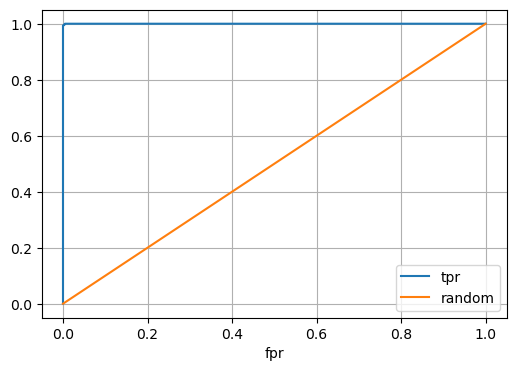

In [169]:
fpr, tpr, thr = roc_curve(y_test, xg_clf.predict_proba(X_test)[:,1])
roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thr':thr});
roc['random'] = roc['fpr'].copy()
roc['diff'] = roc['tpr'] - roc['fpr']
roc.plot(x='fpr', y=['tpr','random'], figsize=(6,4), grid=True)

In [170]:
roc.sort_values('diff', ascending=False)

,fpr,tpr,thr,random,diff
41,0.004644,1.000000,0.333576,0.004644,0.995356
39,0.003096,0.997984,0.496064,0.003096,0.994888
36,0.000000,0.993952,0.995547,0.000000,0.993952
40,0.004644,0.997984,0.399152,0.004644,0.993340
38,0.003096,0.995968,0.499832,0.003096,0.992872
37,0.001548,0.993952,0.500330,0.001548,0.992404
42,0.134675,1.000000,0.000964,0.134675,0.865325
43,0.137771,1.000000,0.000964,0.137771,0.862229
35,0.000000,0.768145,0.999052,0.000000,0.768145
34,0.000000,0.764113,0.999053,0.000000,0.764113


In [171]:
preds = (xg_clf.predict_proba(X_test)[:,1] >= 0.5).astype('int64')
print(f'accuracy_test: {accuracy_score(y_test, preds)}')
print(f'roc_auc_test: {roc_auc_score(y_test, xg_clf.predict_proba(X_test)[:,1])}')
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

accuracy_test: 0.9964973730297724
roc_auc_test: 0.9999797138719665
[[645   1]
 [  3 493]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       646
           1       1.00      0.99      1.00       496

    accuracy                           1.00      1142
   macro avg       1.00      1.00      1.00      1142
weighted avg       1.00      1.00      1.00      1142



In [172]:
preds = (xg_clf.predict_proba(X_test)[:,1] >= 0.333576).astype('int64')
print(f'accuracy_test: {accuracy_score(y_test, preds)}')
print(f'roc_auc_test: {roc_auc_score(y_test, xg_clf.predict_proba(X_test)[:,1])}')
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

accuracy_test: 0.9964973730297724
roc_auc_test: 0.9999797138719665
[[643   3]
 [  1 495]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       646
           1       0.99      1.00      1.00       496

    accuracy                           1.00      1142
   macro avg       1.00      1.00      1.00      1142
weighted avg       1.00      1.00      1.00      1142



In [179]:
predictions = (xg_clf.predict_proba(test)[:,1] >= 0.333576).astype('int64')

In [180]:
sample_sumbission = pd.read_csv('C:/datasets/nlp-getting-started/sample_submission.csv') 

In [181]:
sample_sumbission['target'] = predictions

sample_sumbission.to_csv('C:/datasets/nlp-getting-started/submit01.csv', index=False)

pd.read_csv('C:/datasets/nlp-getting-started/submit01.csv')

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
